In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
warnings.filterwarnings('ignore')
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Workflow of the data
# Collect the data ----> i should be label
# Data Preprocessing
# Train and Testing
# logistic / Random_Forest / Svm / Ensemble Method
# Model Deployment




# 1: Data-Preprocessing

In [11]:
df=pd.read_csv("/content/news.csv")
df.head(2)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE


In [12]:
df.isnull().sum()

,0
Unnamed: 0,0
title,0
text,0
label,0


In [13]:
df.duplicated().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["label"]=le.fit_transform(df["label"])

In [20]:
df.sample(36)

,Unnamed: 0,title,text,label
1288,9698,BREAKING : Trump BEATING “Federal Investigatio...,BREAKING : Trump BEATING “Federal Investigatio...,0
2033,8691,The Loosening Grip of DC,"By Fred Reed October 28, 2016 \nOh good. The w...",0
4931,3384,Many Clinton charity donors also got State Dep...,Twenty-two of the 37 corporations nominated fo...,1
1896,9918,Comment on AG Lynch told FBI Director Comey NO...,Daisy Luther \nAccording to a report in the ...,0
6025,895,"Sorry Gov. Kasich, ‘Electability’ Is Bunk","No, not the number of primaries he’s won, or t...",1
1318,1499,GOP debate: 's Reality Check Team inspects claims,(CNN) The Republican candidates for president ...,1
548,10396,What The Trump Skeptics Got Wrong,Home This Month Popular What The Trump Skeptic...,0
1677,2351,"If Guns Make Us Safer, Why Not Let Them Into t...",It’s a curious feature of American life that w...,1
2284,9424,Currency Crisis: Alasdair MacLeod On The Vexed...,Tweet Home » Gold » Gold News » Currency Crisi...,0
2113,8025,Michael Klare: Whose Finger on the Nuclear But...,Here's something interesting from The Unz Revi...,0


In [16]:
len(max(df["text"]))

4063

In [17]:
len(max(df["title"]))

118

# Text colum have very long apragraph so thats why i am going to keep title and label for the further process



In [18]:
data=df[["title","label"]]
data.head()

,title,label
0,You Can Smell Hillary’s Fear,0
1,Watch The Exact Moment Paul Ryan Committed Pol...,0
2,Kerry to go to Paris in gesture of sympathy,1
3,Bernie supporters on Twitter erupt in anger ag...,0
4,The Battle of New York: Why This Primary Matters,1


# EDA

<Axes: xlabel='label'>

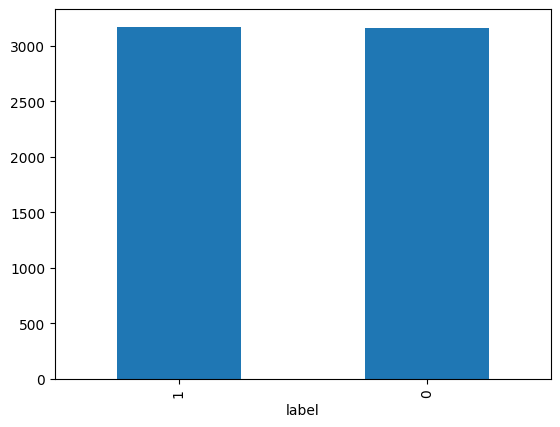

In [19]:
df["label"].value_counts().plot(kind="bar")

In [20]:
print(len(min(df["title"])))
print(min(df["title"]))


84
"America has a simple ideology": how one of Russia's top US experts explains America


In [21]:
print(len(max(df["title"])))
print(min(df["title"]))

118
"America has a simple ideology": how one of Russia's top US experts explains America


In [22]:
import string
extract=string.punctuation
print(extract)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [35]:
ps=PorterStemmer()
nltk.download('stopwords')
def Preprocessing_data(text):
  lib=[]
  text = text.lower()   #convert into the lower
  pattren = re.compile("[^a-zA-Z0-9 ]")  #remove punctuatuion
  text = re.sub(pattren,"",text)
  for i in text.split():
    lib.append(ps.stem(i))    #stem all the word into the root form
  return " ".join(lib)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
data["title"]=data["title"].apply(Preprocessing_data)

In [50]:
def RemoveStopwords(text):
  lib=[]
  for i in text.split():
    if i not in stopwords.words("english"):
      lib.append(i)
  return " ".join(lib)

data["title"]=data["title"].apply(RemoveStopwords)

In [51]:
data["title"].sample(10)

,title
3135,mitt romney could soon endors marco rubio jeb ...
3297,bombshel 2006 audio hillari clinton propos rig...
6302,hillari clinton fbi real novemb surpris
6038,mcconnel lame duck confirm
299,rand paul goe senat floor protest nsa spi measur
3705,trump love poorli educ social media clamor
718,whirlwind day dc showcas trump unorthodox view...
4928,trump clinton trade blow terror gun wake orlan...
3538,trump go away anger stir get start
2508,elect countdown russian trevor loudon


# Seprate data for X and y

In [52]:
X=data["title"]
y=data["label"]

,title
0,smell hillari fear
1,watch exact moment paul ryan commit polit suic...
2,kerri go pari gestur sympathi
3,berni support twitter erupt anger dnc tri warn
4,battl new york whi thi primari matter
...,...
6330,state depart say cant find email clinton speci...
6331,p pb stand plutocrat pentagon
6332,antitrump protest tool oligarchi inform
6333,ethiopia obama seek progress peac secur east a...


# Convert textual data into numerical data

In [58]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X).toarray()

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [59]:
X.shape

(6335, 7603)

In [61]:
X  #now it convert into sparse array.

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Now Apply Model Logistic Regression

In [75]:
Model1=LogisticRegression()
Model1.fit(X_train,y_train)

y_pred = Model1.predict(X_test)
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8216258879242304
[[568  96]
 [130 473]]
0.8312829525483304
0.7844112769485904
0.8071672354948806


# Now apply Random Forest

In [66]:
Model2 = RandomForestClassifier()
Model2.fit(X_train,y_train)

y_pred = Model2.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8153117600631413


# Apply Svc

In [67]:
Model3 = SVC()
Model3.fit(X_train,y_train)

y_pred = Model3.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.8326756116811366


# Now applying voting Ensemble Technique

In [69]:
from sklearn.tree import DecisionTreeClassifier
Model4 = DecisionTreeClassifier(criterion='entropy')
Model4.fit(X_train,y_train)

y_pred = Model4.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7687450670876085


In [77]:
import pickle
pickle.dump(Model1,open("Model1.pkl","wb"))
pickle.dump(tfidf,open("tfidf.pkl","wb"))
pickle.dump(Preprocessing_data,open("Preprocessing_data.pkl","wb"))
pickle.dump(RemoveStopwords,open("RemoveStopwords.pkl","wb"))